In [1]:
# Tetley Sales, Profit Margin & Demographics Dataset
# -------------------------------------------------
# Run this cell by cell in a Jupyter notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ CREATE SYNTHETIC SALES & PROFIT DATA

years = np.arange(2018, 2026)
np.random.seed(42)

# Annual tetley revenue (£M, synthetic)
sales_revenue = np.round(np.linspace(120, 162, len(years)) + np.random.normal(0, 5, len(years)),2)

# Profit margin (as %)
profit_margin = np.round(np.linspace(8, 12, len(years)) + np.random.normal(0,1,len(years)),2)

# Combine into DataFrame
sales_df = pd.DataFrame({
    'Year': years,
    'Sales_Revenue_£M': sales_revenue,
    'Profit_Margin_%': profit_margin
})

sales_df.head()

,Year,Sales_Revenue_£M,Profit_Margin_%
0,2018,122.48,7.53
1,2019,125.31,9.11
2,2020,135.24,8.68
3,2021,145.62,9.25
4,2022,142.83,10.53


In [3]:
# 2️⃣ GENERATING DEMOGRAPHICS DATA

num_customers = 5000

demographics = pd.DataFrame({
    'Customer_ID': np.arange(1, num_customers+1),
    'Age_Group': np.random.choice(['18-24','25-34','35-44','45-54','55-64','65+'], num_customers, p=[0.10,0.18,0.22,0.20,0.17,0.13]),
    'Gender': np.random.choice(['Male','Female','Other'], num_customers, p=[0.48,0.50,0.02]),
    'Region': np.random.choice(['London','Midlands','North England','South England','Scotland','Wales'], num_customers),
    'Annual_Income_£k': np.random.choice(['<20','20-40','40-60','60-80','80+'], num_customers, p=[0.15,0.30,0.25,0.18,0.12])
})

demographics.head()

,Customer_ID,Age_Group,Gender,Region,Annual_Income_£k
0,1,45-54,Female,Midlands,40-60
1,2,25-34,Male,North England,20-40
2,3,35-44,Female,South England,<20
3,4,35-44,Female,Midlands,20-40
4,5,35-44,Female,North England,20-40


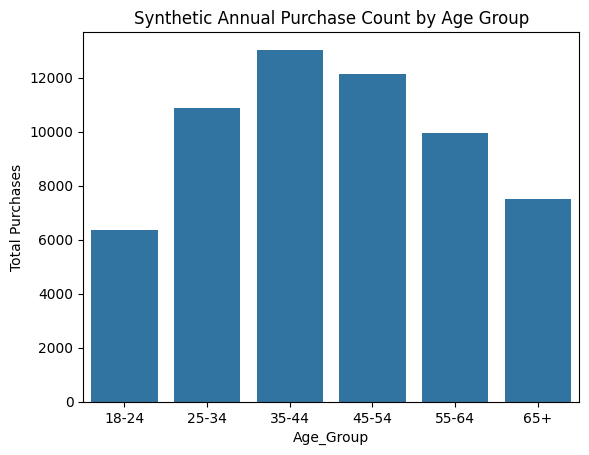

In [4]:
# 3️⃣ SALES VS DEMOGRAPHICS SYNTHETIC EXAMPLE

# Generate synthetic purchase counts
purchase_counts = demographics.copy()
purchase_counts['Annual_Purchases'] = np.random.poisson(lam=12, size=len(demographics))

# Pivot by Age Group
age_purchase = purchase_counts.groupby('Age_Group')['Annual_Purchases'].sum().reset_index()

sns.barplot(data=age_purchase, x='Age_Group', y='Annual_Purchases')
plt.title('Synthetic Annual Purchase Count by Age Group')
plt.ylabel('Total Purchases')
plt.show()

In [5]:
sales_df.to_csv('tetley_sales_profit_trends.csv', index=False)
demographics.to_csv('tetley_customer_demographics.csv', index=False)
purchase_counts.to_csv('tetley_purchase_data.csv', index=False)

print("Export complete ✔️")

Export complete ✔️
